In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# read the train dataset
df = pd.read_csv("traindata.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# summary of the numerical fields
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df = df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [8]:
df['Gender'].value_counts()


Male      394
Female     86
Name: Gender, dtype: int64

In [10]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [13]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [15]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [16]:
df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [17]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [18]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [27]:
# Analysis for outliers
plt.figure()

df['LoanAmount'].plot.hist(bins=20)


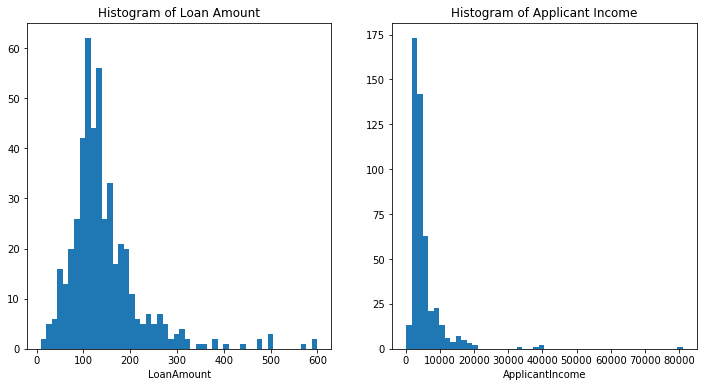

In [34]:
# Frequency charts for Loan Amount and Applicant Income
fig = plt.figure(figsize=(12, 6))
Amount = fig.add_subplot(121)
Income = fig.add_subplot(122)

Amount.hist(df['LoanAmount'], bins=50)
Amount.set_xlabel('LoanAmount')
Amount.set_title("Histogram of Loan Amount")

Income.hist(df['ApplicantIncome'], bins=50)
Income.set_xlabel('ApplicantIncome')
Income.set_title("Histogram of Applicant Income")

plt.show()

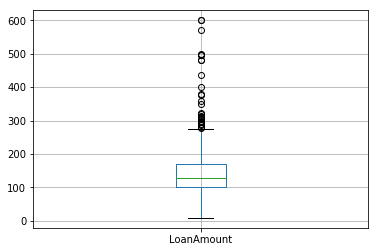

In [37]:
# Outliers and extreme values for LoanAmount
df.boxplot(column='LoanAmount')
plt.show()


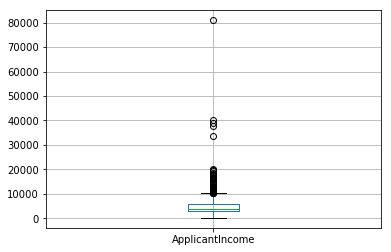

In [32]:
# Outliers and extreme values for 'ApplicantIncome'
df.boxplot(column='ApplicantIncome')
plt.show()

In [56]:
#count of applicants by credit history 0 or 1
cred_history = df['Credit_History'].value_counts(ascending=True)

# probability of getting loan based on credit history
# create a pivot table 
prob = pd.pivot_table(df,index=["Credit_History"],values=["Loan_Status"],aggfunc=np.mean)


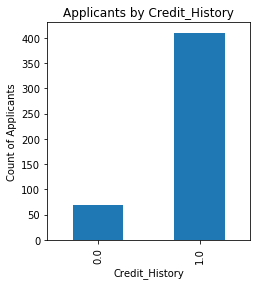

In [64]:
# plot the number of applicants vs credit_history(0 or 1)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
cred_history.plot(kind='bar')
plt.show()



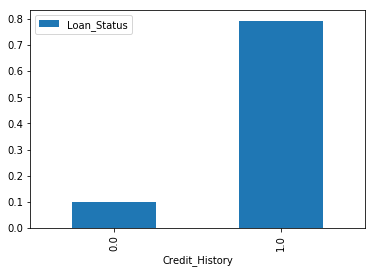

In [65]:
# plot Probability of getting a loan vs credit history(0 or 1)
ax2 = fig.add_subplot(122)
prob.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
plt.show()